In [1]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
crm = pdr.get_data_yahoo('CRM')
xom = pdr.get_data_yahoo('XOM')
orcl = pdr.get_data_yahoo('ORCL')

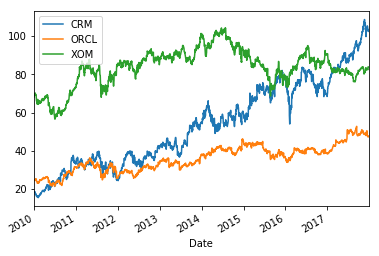

In [3]:
def v(df):
    return df['Close']

df0 = pd.DataFrame(data={
    'CRM': v(crm),
    'XOM': v(xom),
    'ORCL': v(orcl)
})

df0.plot()
plt.show()

In [4]:
def sliding_window(index, length):
    for i in range(len(index) - length):
        yield index[i], index[i + length]

def r(df, enter, leave, crm_p, xom_p, orcl_p):
    crm_r = crm_p * df.loc[leave]['CRM'] / df.loc[enter]['CRM']
    xom_r = xom_p * df.loc[leave]['XOM'] / df.loc[enter]['XOM']
    orcl_r = orcl_p * df.loc[leave]['ORCL'] / df.loc[enter]['ORCL']

    return crm_r + xom_r + orcl_r

data = np.array([
    [enter, leave, r(df0, enter, leave, 0.4, 0.4, 0.2)]
    for (enter, leave)
    in sliding_window(df0.index, int(0.25 * 260))
])

df1 = pd.DataFrame(data={
    'Enter': data[:, 0],
    'Leave': data[:, 1],
    'Return': data[:, 2]
})

In [5]:
df1.sort_values(by='Return', ascending=False).head()

,Enter,Leave,Return
159,2010-08-19,2010-11-19,1.28801
502,2011-12-28,2012-04-02,1.27315
500,2011-12-23,2012-03-29,1.26718
498,2011-12-21,2012-03-27,1.26464
195,2010-10-11,2011-01-12,1.26381
